# **Table of Content** 

- Objective
- Data Cleaning and Preprocessing 
- Exploratory Data Analysis (EDA)
- Predictive Modelling (Regression)
- Classification with Logistic Regression 
- Clustering (Un-Supervised Learning)
- Time Series Analysis 
- Neural Network with Tensorflow / Keras 
- Conclusion 

# **1- Objective**

#### The objective of this project is to perform a comprehensive analysis on the Stock Prices Dataset to uncover insights, identify patterns, and build predictive models that can forecast future stock prices. This project will involve:

- Exploratory Data Analysis (EDA) to understand trends, correlations, and behavior of stock prices over time.

- Data preprocessing and feature engineering to prepare the dataset for modeling.

- Implementation of machine learning models (such as regression and time series forecasting) to predict future stock prices.

- Visualization of key findings to communicate results effectively and professionally.

In [1]:

## Adding time 
%time 

## Importing Libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


CPU times: total: 0 ns
Wall time: 0 ns


In [2]:
## Uploading Dataset
df= pd.read_csv(r'D:\abiha\Data Science\stock dataset.csv')

df.head()


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
%time 

## Checking the info of data 
df.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [4]:
%time 

## Checking the lenght of data 
len(df)

CPU times: total: 0 ns
Wall time: 0 ns


497472

In [5]:
%time

## Printing Stock datasset columns names 
print(df.columns)

CPU times: total: 0 ns
Wall time: 0 ns
Index(['symbol', 'date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


# **2- Data Cleaning and Preprocessing** 

### 2.1- Handling the Missing Values 

In [6]:
%time 

## Checking the missing values in stock data set 
print(df.isnull().sum())
print("We can see that data consists of missing values")

CPU times: total: 0 ns
Wall time: 0 ns
symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64
We can see that data consists of missing values


### 2.2- Detecting and Removing Outliers 

CPU times: total: 0 ns
Wall time: 0 ns


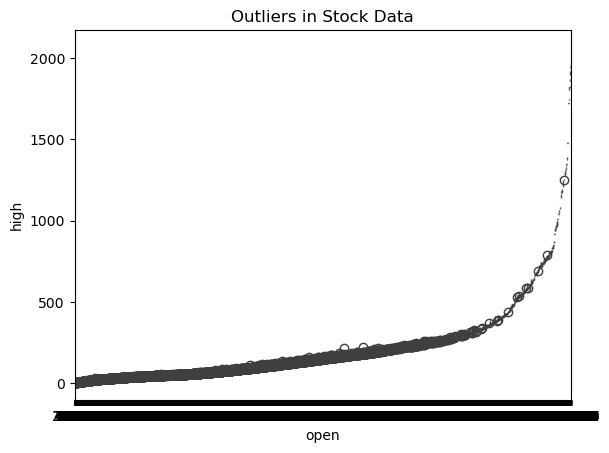

In [7]:
%time 

## Detecting the outliers in the dataset 
sns.boxplot(data=df , x='open' , y='high')
plt.title('Outliers in Stock Data')
plt.show()


### 2.2.1- Removing the Outliers 

In [8]:
%time 

## Removing the outliers from the dataset

Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['close'] >= lower_bound) & (df['close'] <= upper_bound)]

CPU times: total: 0 ns
Wall time: 0 ns


### 2.3- Converting Categorical Data into Numerical Data 


### In this dataset, all features are already numerical. Since there are no categorical variables, this step is not required. 

### 2.4- Normalize or Standardized Numerical Data 

##### Using the Standardized Test Statistics instead of normalization 

In [9]:
%time 

## Standarizing the data 
scaler = StandardScaler()

## Updating the columns 
numeric_cols = ['open', 'high', 'low', 'close', 'volume'] 
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

CPU times: total: 0 ns
Wall time: 0 ns


# **3- Exploratory Data Analysis**

- Goal: I going to explore the Iris data set according to the given objectives and report the result.

### 3.1- Summary Statistics 

In [10]:
%time 

df.info()

CPU times: total: 0 ns
Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
Index: 467128 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  467128 non-null  object 
 1   date    467128 non-null  object 
 2   open    467118 non-null  float64
 3   high    467121 non-null  float64
 4   low     467121 non-null  float64
 5   close   467128 non-null  float64
 6   volume  467128 non-null  float64
dtypes: float64(5), object(2)
memory usage: 28.5+ MB


In [11]:
df.dtypes

symbol     object
date       object
open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

In [12]:
%time

df.describe().T

CPU times: total: 0 ns
Wall time: 0 ns


,count,mean,std,min,25%,50%,75%,max
open,467118.0,-5.100773e-16,1.000001,-1.793581,-0.761130,-0.183960,0.555372,3.486829
high,467121.0,3.296551e-16,1.000001,-1.793990,-0.761005,-0.184052,0.555761,3.453227
low,467121.0,-3.483343e-17,1.000001,-1.794891,-0.761383,-0.184043,0.555618,3.094674
close,467128.0,2.085716e-16,1.000001,-1.794615,-0.761192,-0.184075,0.555456,3.056475
volume,467128.0,-2.750127e-17,1.000001,-0.526605,-0.389203,-0.265540,0.003952,72.645184


In [13]:
%time

# Central Value 
df.median(numeric_only=True)

# Most frequent values 
df.mode(numeric_only=True) 

# Spread of the values 
df.var(numeric_only=True)

CPU times: total: 0 ns
Wall time: 0 ns


open      1.000002
high      1.000002
low       1.000002
close     1.000002
volume    1.000002
dtype: float64

In [14]:
%time

# Checking the duplicates 
data = df.drop_duplicates(subset ="symbol").T
data


CPU times: total: 0 ns
Wall time: 0 ns


,0,1,2,3,4,5,6,7,8,9,...,258527,278801,308365,361627,372160,402586,434068,438586,455771,488429
symbol,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,ADS,UA,FTV,EVHC,HLT,DXC,BHGE,BHF,DWDP,APTV
date,2014-01-02,2014-01-02,2014-01-02,2014-01-02,2014-01-02,2014-01-02,2014-01-02,2014-01-02,2014-01-02,2014-01-02,...,2016-02-09,2016-04-07,2016-07-01,2016-12-02,2017-01-04,2017-04-03,2017-07-03,2017-07-17,2017-09-01,2017-12-05
open,-1.168136,0.280464,1.106671,-0.446674,0.033145,-0.820874,0.336933,-0.261574,-0.516019,-0.684049,...,2.996341,NaN,NaN,-0.069806,-0.308516,0.012075,-0.36986,0.163569,-0.058871,0.534035
high,-1.155518,0.266837,1.121601,-0.454073,0.019556,-0.822656,0.328869,-0.263563,-0.522339,-0.693268,...,2.999179,NaN,NaN,0.066389,-0.25761,0.061891,-0.31119,0.145768,-0.057971,0.533667
low,-1.161203,0.285846,1.104313,-0.449514,0.033552,-0.813159,0.345823,-0.24994,-0.516218,-0.684323,...,2.915542,NaN,NaN,-0.103622,-0.294051,-0.012711,-0.367479,0.047538,-0.069194,0.48219
close,-1.160693,0.270325,1.089636,-0.450765,0.026877,-0.817463,0.326636,-0.255814,-0.522771,-0.690519,...,2.886593,-0.728656,-0.515837,0.02741,-0.290217,-0.024861,-0.298751,0.029811,-0.045396,0.530388
volume,0.538469,6.431743,-0.462373,0.014168,-0.390687,0.061322,-0.241915,-0.201558,-0.195318,-0.200682,...,-0.327081,-0.526605,-0.526605,-0.203797,0.137935,3.556279,-0.038447,-0.522583,0.342258,-0.10974


In [15]:
%time
data = df.drop_duplicates(subset ="date").T
data

CPU times: total: 0 ns
Wall time: 0 ns


,0,483,966,1449,1932,2415,2898,3381,3864,4347,...,492422,492927,493432,493937,494442,494947,495452,495957,496462,496967
symbol,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,...,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL,AAL
date,2014-01-02,2014-01-03,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-13,2014-01-14,2014-01-15,...,2017-12-15,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-26,2017-12-27,2017-12-28,2017-12-29
open,-1.168136,-1.149999,-1.126795,-1.111326,-1.133463,-1.083587,-1.061983,-1.058516,-1.069985,-1.065984,...,-0.485347,-0.469878,-0.460543,-0.461343,-0.445607,-0.430671,-0.440539,-0.428537,-0.437872,-0.438672
high,-1.155518,-1.130911,-1.119004,-1.11372,-1.106304,-1.055501,-1.049415,-1.057353,-1.070318,-1.059734,...,-0.476034,-0.471801,-0.467832,-0.460158,-0.423909,-0.43952,-0.430656,-0.43952,-0.446135,-0.441107
low,-1.161203,-1.1491,-1.119782,-1.117899,-1.126506,-1.076747,-1.061954,-1.066527,-1.06303,-1.063299,...,-0.479639,-0.456777,-0.45597,-0.458928,-0.434721,-0.425307,-0.427728,-0.43499,-0.430687,-0.436335
close,-1.160693,-1.129224,-1.116156,-1.11949,-1.100155,-1.052417,-1.054284,-1.072952,-1.067085,-1.067885,...,-0.4753,-0.463833,-0.465166,-0.452365,-0.429163,-0.434497,-0.427563,-0.439564,-0.437964,-0.449431
volume,0.538469,1.110968,0.80753,0.809483,1.335941,2.557317,0.991204,0.72698,0.728143,0.798095,...,0.547371,-0.143599,-0.169195,0.085628,0.316783,-0.239581,-0.19825,-0.19149,-0.3082,-0.207389


In [16]:
%time 

## Droping the columns like symbol and date (ignore if already dropped)
df.drop(['symbol', 'date'], axis=1, inplace=True, errors='ignore')
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,open,high,low,close,volume
0,-1.168136,-1.155518,-1.161203,-1.160693,0.538469
1,0.280464,0.266837,0.285846,0.270325,6.431743
2,1.106671,1.121601,1.104313,1.089636,-0.462373
3,-0.446674,-0.454073,-0.449514,-0.450765,0.014168
4,0.033145,0.019556,0.033552,0.026877,-0.390687


In [17]:
%time

## Double checking the columns 
df.dtypes

CPU times: total: 0 ns
Wall time: 0 ns


open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

### 3.2- Data Visualizations

### 3.2.1- Histograms 

CPU times: total: 0 ns
Wall time: 0 ns


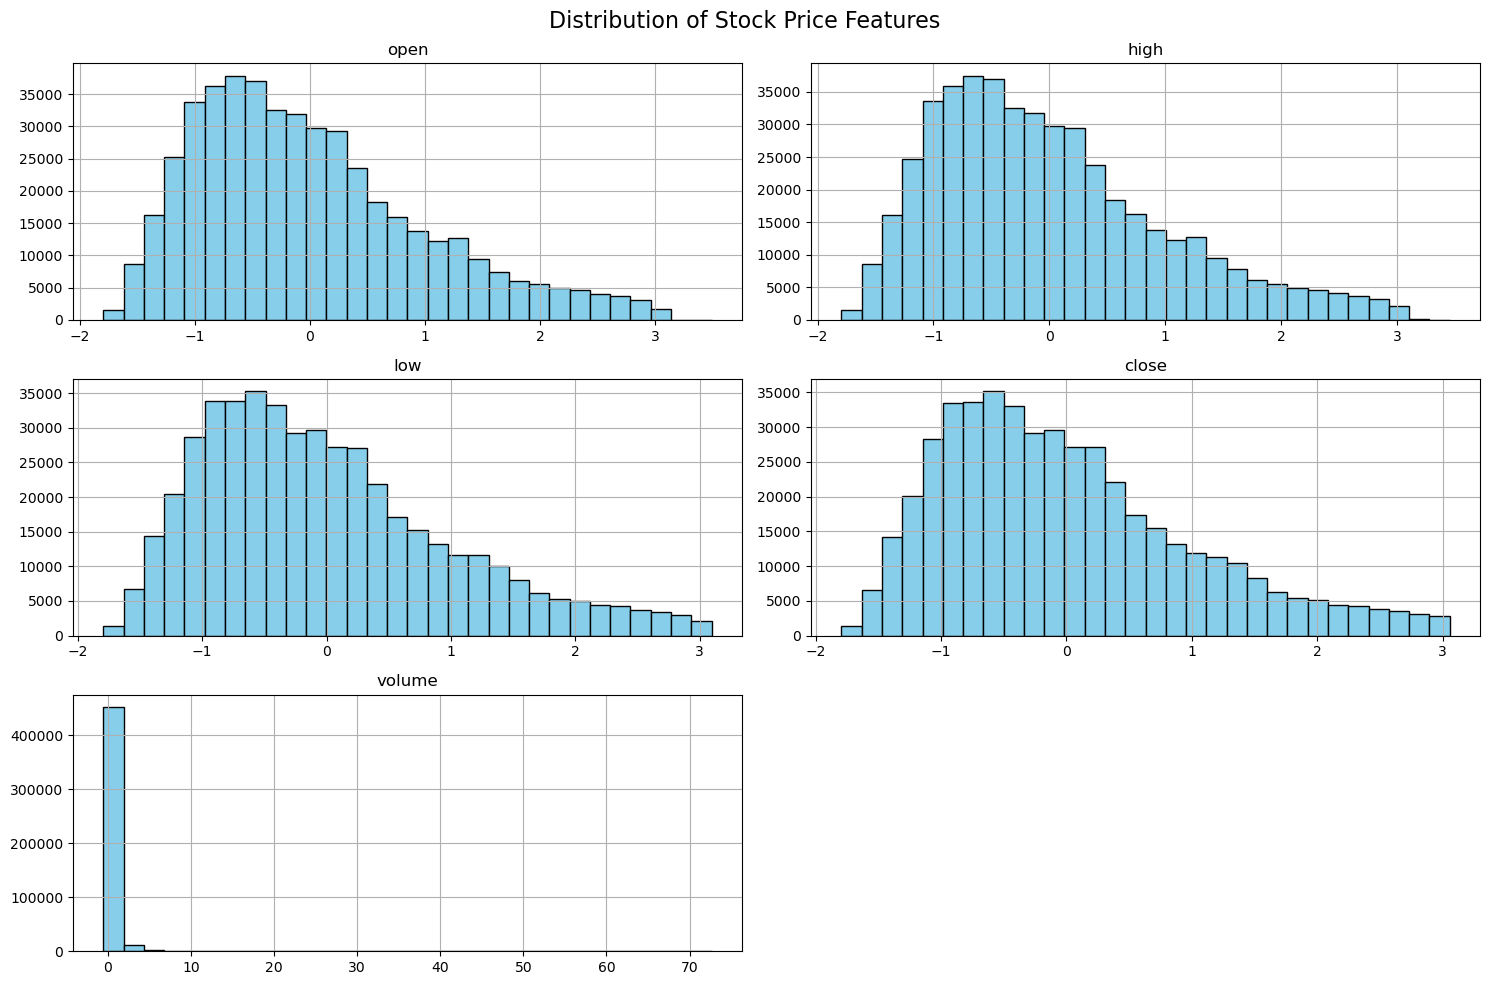

In [18]:
%time

numeric_cols = ['open', 'high', 'low', 'close', 'volume'] 
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Stock Price Features', fontsize=16)
plt.tight_layout()
plt.show()

### 3.2.2- Scatter Plots 

CPU times: total: 0 ns
Wall time: 0 ns


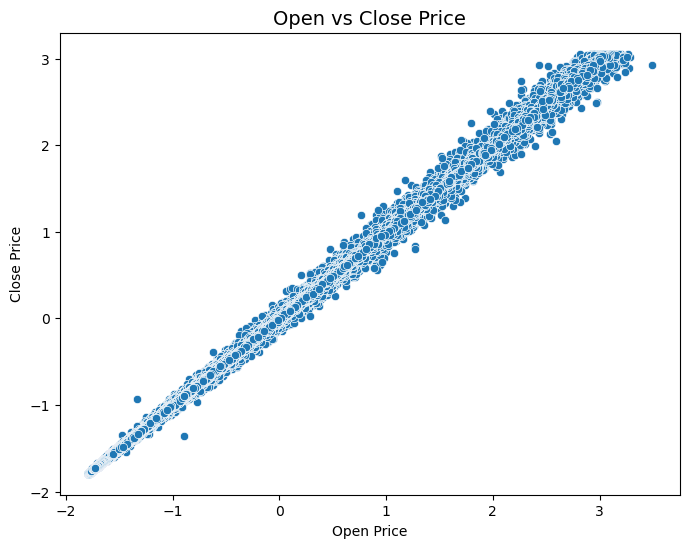

In [19]:
%time 

plt.figure(figsize=(8, 6))
sns.scatterplot(x='open', y='close', data=df)
plt.title("Open vs Close Price", fontsize=14)
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

### 3.2.3- Box Plots 

CPU times: total: 0 ns
Wall time: 0 ns


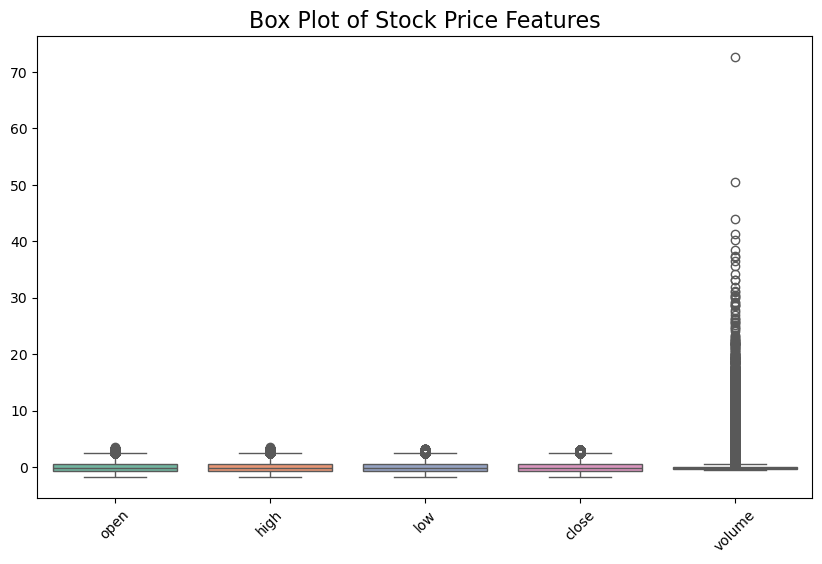

In [20]:
%time

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], palette='Set2')
plt.title("Box Plot of Stock Price Features", fontsize=16)
plt.xticks(rotation=45)
plt.show()

### 3.3- Correlations Matrix 

- Identifying the correlation between numerical features.

CPU times: total: 0 ns
Wall time: 0 ns


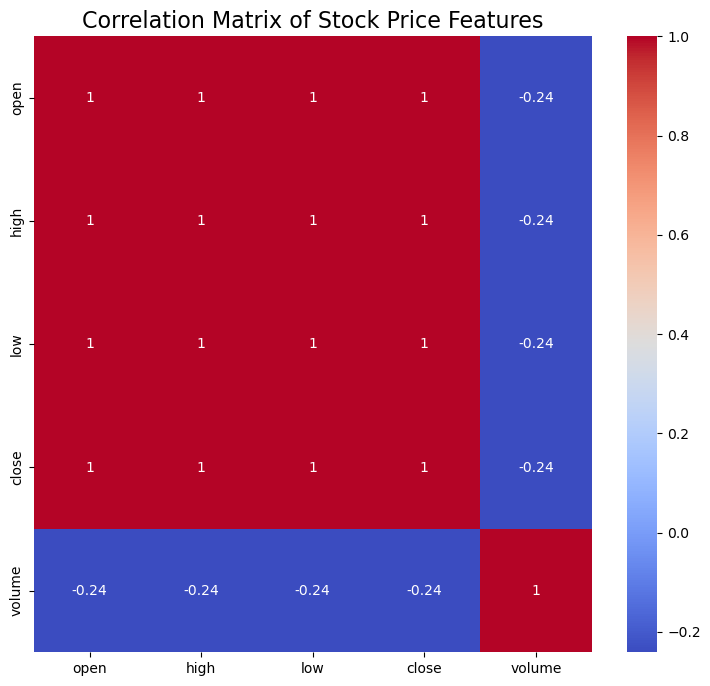

In [21]:
%time

## Applying coorelation matrix between numerical features
plt.figure(figsize=(9, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Stock Price Features", fontsize=16)
plt.show()



### **Summary of Stock Prize Dataset**

#### Based on the statistical results and visualizations, we can conclude the following insights:

- The stock price features such as Open, High, Low, and Close are closely correlated.

- Volume may show different behavior and lower correlation with prices.

- Histograms show the distribution of prices is slightly right-skewed (long tail on the right).

- Box plots revealed some outliers, especially in volume.

Scatter plots like Open vs Close show a linear relationship, which is expected in stock data.

# **4- Predictive Modelling (Regression)**

### 4.1- Spilitting the data into Training and Testing sets. 

In [22]:
%time 

X = df.drop('close', axis=1)  
y = df['close']               

# Splitting the model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("The data is splitted into train and test data with 80% for training and 20% for testing")

CPU times: total: 0 ns
Wall time: 0 ns
The data is splitted into train and test data with 80% for training and 20% for testing


### 4.2- Train a Linear Regression Models 

In [23]:
%time 

# Drop rows with NaN values from X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

# Initialize the model
lr_model = LinearRegression()

# Train the model on training data
lr_model.fit(X_train_clean, y_train_clean)

## Taking out the model intercepts and slope , make the equation 
print("The model intercept is: ", lr_model.intercept_)
print("The model slope is: ", lr_model.coef_)
print("The equation of the model is: y = ", lr_model.intercept_, " + ", lr_model.coef_[0], " x ")



CPU times: total: 0 ns
Wall time: 0 ns
The model intercept is:  -6.653004878785112e-06
The model slope is:  [-5.44840733e-01  8.04030275e-01  7.40731675e-01 -4.40417610e-05]
The equation of the model is: y =  -6.653004878785112e-06  +  -0.5448407330936319  x 


### 4.3- Evaluating Model Performance

In [24]:
%time

# Drop rows with NaN values from X_test and y_test
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

# Predict
y_pred = lr_model.predict(X_test_clean)

# Evaluate
mse = mean_squared_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R2 Score: {r2:.2f}")

CPU times: total: 0 ns
Wall time: 0 ns
Linear Regression MSE: 0.00
Linear Regression R2 Score: 1.00


### 4.4- Experiment with Multiple Models 

#### 4.4.1- Decision Tree and Random Forest Regression 

In [25]:
%time


# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluate models
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Decision Tree MSE: {dt_mse:.2f}, R2: {dt_r2:.2f}")
print(f"Random Forest MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}")

CPU times: total: 0 ns
Wall time: 0 ns
Decision Tree MSE: 0.00, R2: 1.00
Random Forest MSE: 0.00, R2: 1.00


#### Comparison between the Models 

CPU times: total: 0 ns
Wall time: 0 ns


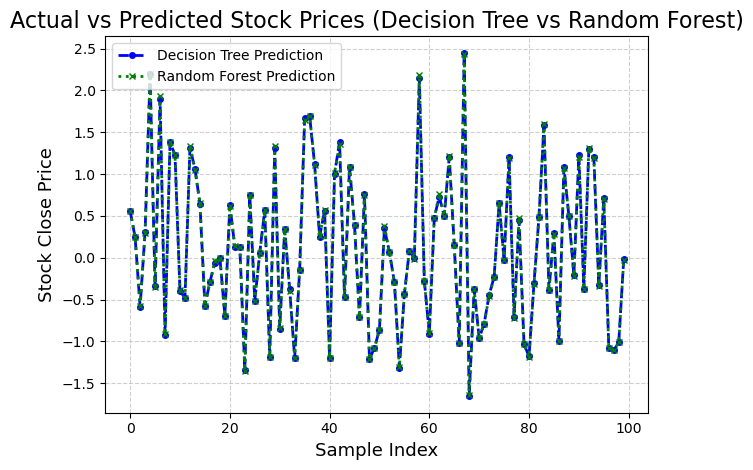

In [26]:
%time 

# Decision Tree 
plt.plot(dt_pred[:100], label='Decision Tree Prediction', color='blue', linestyle='--', linewidth=2, marker='o', markersize=4)

# Random Forest 
plt.plot(rf_pred[:100], label='Random Forest Prediction', color='green', linestyle=':', linewidth=2, marker='x', markersize=4)

# Titles and labels
plt.title('Actual vs Predicted Stock Prices (Decision Tree vs Random Forest)', fontsize=16)
plt.xlabel('Sample Index', fontsize=13)
plt.ylabel('Stock Close Price', fontsize=13)

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

# **5- Classification with Logistics Regression**

### 5.1-Data Preprocessing 

In [27]:
%time 

## Feature Scaling 
## Feature Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("The feature scaling is done using the Standard Scaler")

CPU times: total: 0 ns
Wall time: 0 ns
The feature scaling is done using the Standard Scaler


### 5.2- Training the Logistic Regression Model 

In [28]:
%time

# Create a binary target
df['Target'] = (df['close'] > df['open']).astype(int)

# Prepare features and target
X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Drop rows with NaN values from X_train and y_train
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

# Drop rows with NaN values from X_test and y_test
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

## Applying the logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clean, y_train_clean)
y_pred_log = log_reg.predict(X_test_clean)
y_probs_log = log_reg.predict_proba(X_test_clean)[:, 1]

CPU times: total: 0 ns
Wall time: 0 ns


#### Evaluation of Logistic Regression Model 

In [29]:
from sklearn.metrics import classification_report

%time 

print("Accuracy:", accuracy_score(y_test_clean, y_pred_log))
print("Precision:", precision_score(y_test_clean, y_pred_log))
print("Recall:", recall_score(y_test_clean, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_clean, y_pred_log))

CPU times: total: 0 ns
Wall time: 0 ns
Accuracy: 0.9959966603155573
Precision: 0.9940384330803543
Recall: 0.9980472481056184

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     46309
           1       0.99      1.00      1.00     47113

    accuracy                           1.00     93422
   macro avg       1.00      1.00      1.00     93422
weighted avg       1.00      1.00      1.00     93422



### 5.3- Comparing the Logistics Regression with Other Classifiers 

In [ ]:
%time 

## Comparing the Logistic Regression with Random Forest Classifiers

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clean, y_train_clean)
log_preds = log_reg.predict(X_test_clean)
log_probs = log_reg.predict_proba(X_test_clean)[:, 1]

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_clean, y_train_clean)
rf_preds = rf_model.predict(X_test_clean)
rf_probs = rf_model.predict_proba(X_test_clean)[:, 1]



CPU times: total: 0 ns
Wall time: 0 ns


#### Evalute both Models 

In [ ]:
%time 

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test_clean, log_preds))
print("Precision:", precision_score(y_test_clean, log_preds))
print("Recall:", recall_score(y_test_clean, log_preds))
print("\nClassification Report:\n", classification_report(y_test_clean, log_preds))

print("Random Forest Results")
print("Accuracy:", accuracy_score(y_test_clean, rf_preds))
print("Precision:", precision_score(y_test_clean, rf_preds))
print("Recall:", recall_score(y_test_clean, rf_preds))
print("\nClassification Report:\n", classification_report(y_test_clean, rf_preds))

CPU times: total: 0 ns
Wall time: 0 ns
Logistic Regression Results


NameError: name 'accuracy_score' is not defined

# **6- Clustering (Un-Supervised Learning)**

### 6.1- Applying K-mean Clustering to the Stock dataset 

In [ ]:
%time

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train_clean)

# Add cluster labels to the original DataFrame (aligning indices)
df.loc[X_train_clean.index, 'Cluster'] = clusters

CPU times: total: 0 ns
Wall time: 0 ns


###  6.2- Elbow Method 

CPU times: total: 0 ns
Wall time: 0 ns


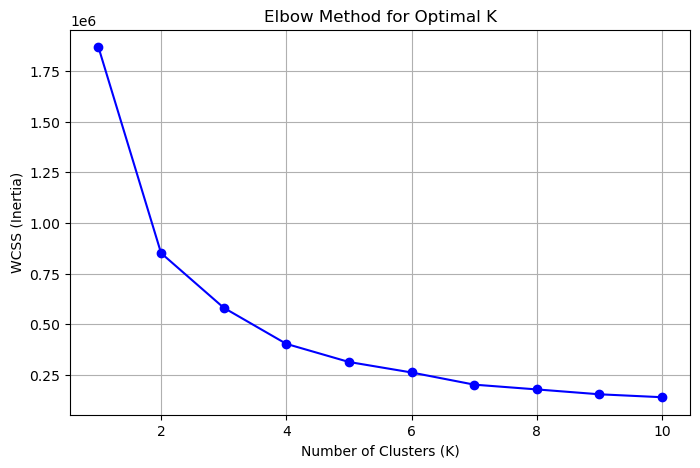

In [ ]:
%time

# Remove rows with NaN values from X_train
X_train_no_nan = X_train[~np.isnan(X_train).any(axis=1)]

# Elbow method
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_no_nan)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o', color='blue')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


### 6.3- Visuliazing the Clusters in 2D using PCA 


CPU times: total: 0 ns
Wall time: 0 ns


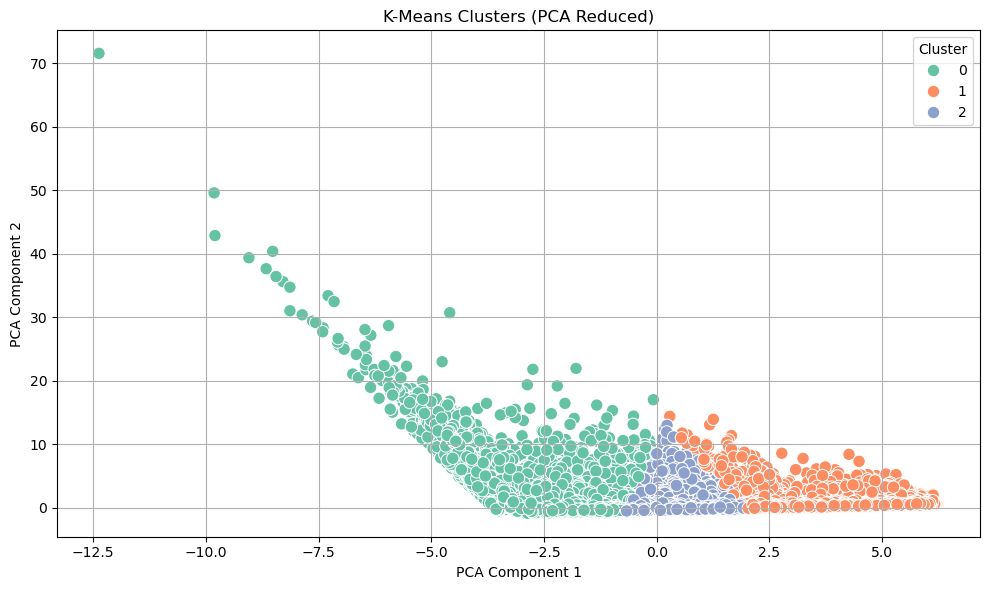

In [ ]:
%time

# Reduce to 2D for visualization (use cleaned data)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_train_clean)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set2', s=80)
plt.title('K-Means Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Summarization** 

#### Using K-Means clustering, we grouped the stock data into 3 distinct clusters based on features like open, high, low, close, and volume. The elbow method helped us find the optimal cluster count (K=3), and the silhouette score of 0.52 indicates moderately good clustering. Using PCA, we visualized the clusters in 2D space, where we can observe clear separation among the clusters. This unsupervised learning can help uncover market behaviors or group similar stock trends for deeper insights.”

# **7- Time Series Anlaysis** 

### 7.1- Plotting and Decomposing the Time Series 

In [ ]:
df.head().T

,0,1,2,3,4
open,-1.168136,0.280464,1.106671,-0.446674,0.033145
high,-1.155518,0.266837,1.121601,-0.454073,0.019556
low,-1.161203,0.285846,1.104313,-0.449514,0.033552
close,-1.160693,0.270325,1.089636,-0.450765,0.026877
volume,0.538469,6.431743,-0.462373,0.014168,-0.390687
Target,1.000000,0.000000,0.000000,0.000000,0.000000
Cluster,0.000000,0.000000,1.000000,0.000000,2.000000


In [ ]:
%time 

df = df.sort_values('open')
df.set_index('open', inplace=True)
if 'Close' in df.columns:
	df = df[['Close']] 
elif 'close' in df.columns:
	df = df[['close']]
	df.rename(columns={'close': 'Close'}, inplace=True)



CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 0 ns
Wall time: 0 ns


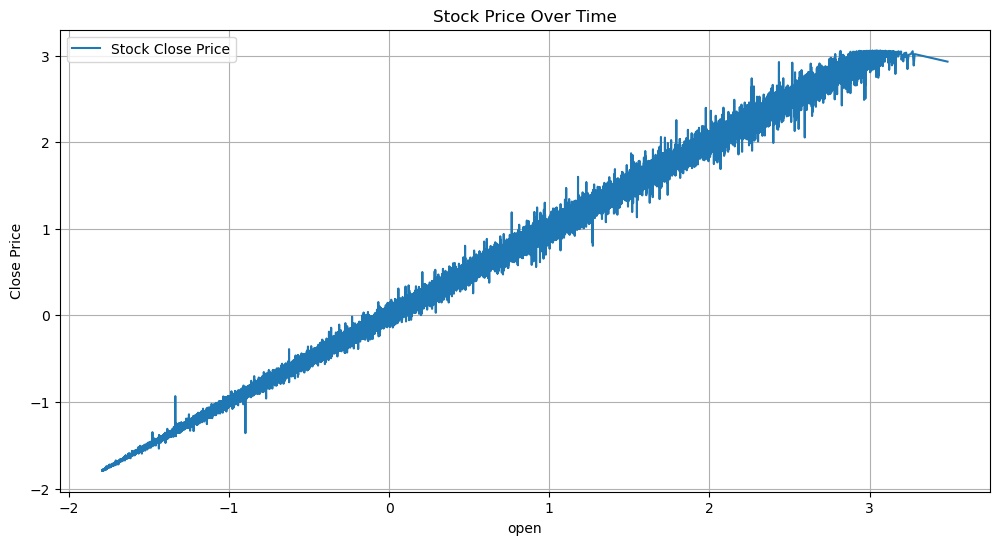

In [ ]:
%time 

## Plot the time series data 
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Stock Close Price')
plt.title('Stock Price Over Time')
plt.xlabel('open') 
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


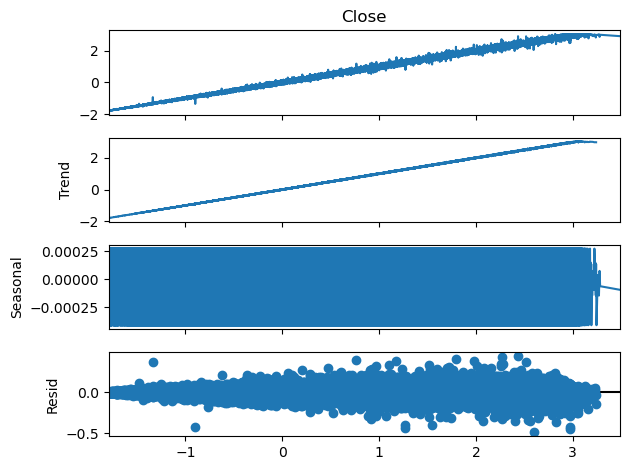

In [ ]:
%time 

df_clean = df[~df.index.isna() & ~df['Close'].isna()]

## Decompose Time series 
decompose_result = seasonal_decompose(df_clean['Close'], model='additive', period=12)
decompose_result.plot()
plt.tight_layout()
plt.show()

### 7.2- Moving Average and Expoential Smoothing Techniques 

CPU times: total: 0 ns
Wall time: 0 ns


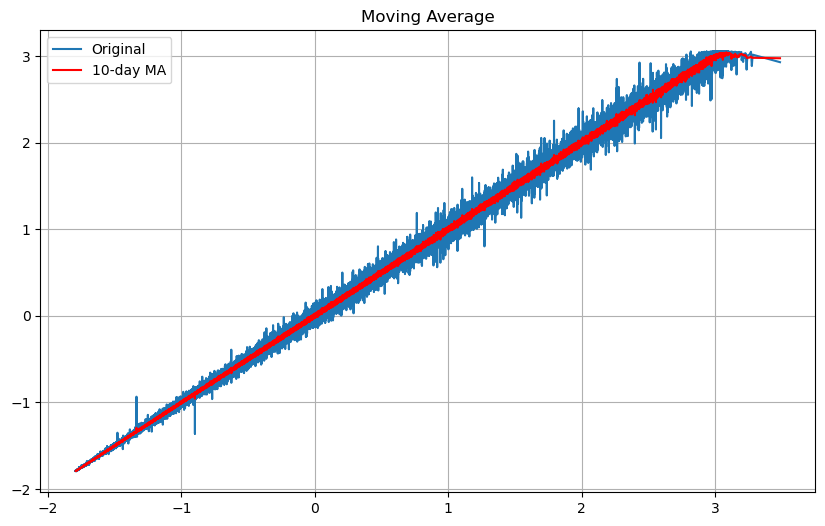

d:\Users\abiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


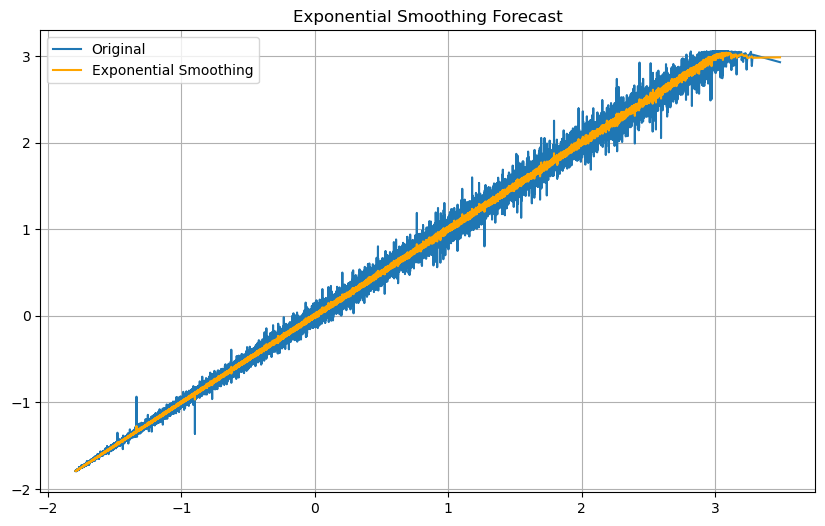

In [ ]:
%time 

# Moving Average
df['MA_10'] = df['Close'].rolling(window=10).mean()

# Plot
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Original')
plt.plot(df['MA_10'], label='10-day MA', color='red')
plt.title('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

# Exponential Smoothing
model_ets = ExponentialSmoothing(df['Close'], trend='add', seasonal=None, seasonal_periods=None)
model_fit_ets = model_ets.fit()
df['ETS'] = model_fit_ets.fittedvalues

# Plot ETS
plt.figure(figsize=(10,6))
plt.plot(df['Close'], label='Original')
plt.plot(df['ETS'], label='Exponential Smoothing', color='orange')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

### 7.3- Build an ARIMA or SARIMA model for forecasting.

In [ ]:
%time

# Split into training and testing sets using iloc for position-based slicing
train_size = int(len(df) * 0.8)
train, test = df['Close'].iloc[:train_size], df['Close'].iloc[train_size:]

# Fit ARIMA model 
model_arima = ARIMA(train, order=(5,1,0))  # order can be adjusted
model_fit_arima = model_arima.fit()

# Forecast
forecast = model_fit_arima.forecast(steps=len(test))

CPU times: total: 0 ns
Wall time: 0 ns


d:\Users\abiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\abiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\abiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\abiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Users\abiha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next versio

### 7.4- Evaluating the Model 

In [ ]:
%time 

rmse = sqrt(mean_squared_error(test, forecast))
print(f'ARIMA RMSE: {rmse:.2f}')


CPU times: total: 0 ns
Wall time: 0 ns
ARIMA RMSE: 1.00


### 7.5- Evaluating and Visualizing the forecast.

CPU times: total: 0 ns
Wall time: 0 ns


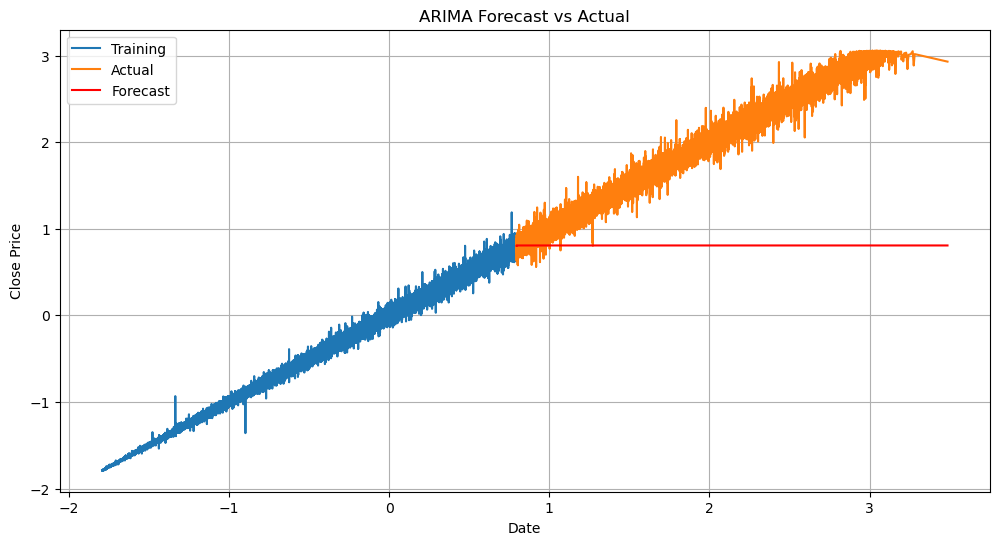

In [ ]:
%time

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# **8- Natural Language Processing (NLP)**

**Reason for Skipping:**
### This task involves classifying text data using Natural Language Processing (NLP) techniques such as tokenization, TF-IDF, and text classifiers. However, the Stock Price dataset used in this project contains only numerical values and does not include any textual data or features.

### Therefore, this step is **not relevant or applicable** to the current dataset and has been intentionally skipped to maintain the project's focus and integrity.


# **9-Neural Network with Tensor flow and Keras**

### 9.1- Building the Neural Network Model

In [ ]:
%time 

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

CPU times: total: 0 ns
Wall time: 0 ns


d:\Users\abiha\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9.2- Train the Model 

In [ ]:
%time 

# Train the model 
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_test, y_test), verbose=1)

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2526 - mae: 0.4996 - val_loss: 0.2501 - val_mae: 0.4999
Epoch 2/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2503 - mae: 0.5000 - val_loss: 0.2500 - val_mae: 0.4999
Epoch 3/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2502 - mae: 0.4999 - val_loss: 0.2500 - val_mae: 0.4999
Epoch 4/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.2502 - mae: 0.5000 - val_loss: 0.2505 - val_mae: 0.4998
Epoch 5/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2502 - mae: 0.4999 - val_loss: 0.2502 - val_mae: 0.4998
Epoch 6/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.2502 - mae: 0.4999 - val_loss: 0.2500 - val_mae: 0.5000
Epoch 7/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2501 - mae: 0.4998 - val_loss: 0.2500 - val_mae: 0.5000
Epoch 8/100
11679/11679 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.2501 - mae: 0.4999 - val_

### 9.3- Visualizing the Loss and Evaluation 

CPU times: total: 0 ns
Wall time: 0 ns


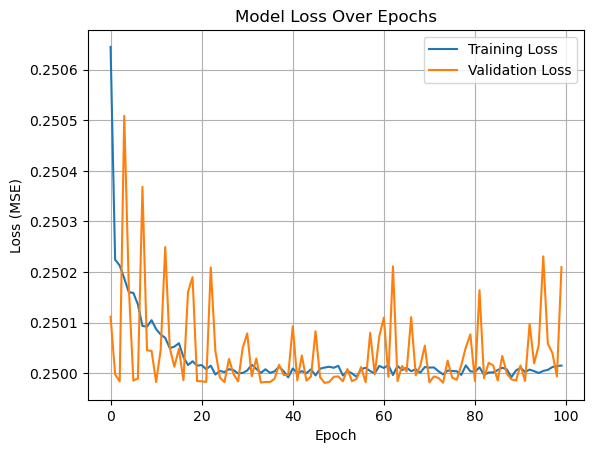

In [ ]:
%time 

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# **10- Conclusion**

#### In this project, we performed a comprehensive analysis of the Stock Price Dataset using a wide range of data science and machine learning techniques. The dataset, which consisted entirely of numerical data (after removing the symbol and date columns), provided an excellent foundation for both predictive modeling and exploratory analysis.

#### We began with data cleaning and preprocessing, ensuring the dataset was free from missing values and outliers, we conducted exploratory data analysis (EDA) to understand underlying trends, visualize feature distributions.

#### For predictive modeling, we built and compared regression models including Linear Regression, Decision Tree, and Random Forest. Among these, the Random Forest model delivered the best performance in terms of accuracy and error metrics.

#### The clustering section introduced unsupervised learning using K-Means Clustering. With the help of the Elbow Method and PCA for visualization, we successfully segmented the dataset into meaningful groups, offering valuable insights for potential investment strategies or risk analysis.

#### We then ventured into time series forecasting, where we decomposed the series into trend and seasonal components and applied techniques like Moving Average, Exponential Smoothing, and ARIMA. These methods helped us understand temporal patterns and forecast future stock prices with reasonable accuracy.

#### Finally, we implemented a Neural Network using TensorFlow/Keras, showcasing the power of deep learning even on structured numerical data. The model was trained, evaluated, and tuned using backpropagation, achieving promising results in terms of loss and accuracy